In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('../data/All_mutation_information.csv.gz')

C:\Users\voron\AppData\Local\Temp\ipykernel_13032\3160139400.py:1: DtypeWarning: Columns (13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/All_mutation_information.csv.gz')


In [29]:
syn_df = df[df['(SBS) is nonsynonymous'].isin(['FALSE', 'False'])]
syn_df = syn_df[syn_df['base(s) in status 1'].isin(['A', 'T', 'G', 'C']) & syn_df['base(s) in status 2'].isin(['A', 'T', 'G', 'C'])]

In [30]:
syn_df.head()

,mutID,type,status 1,status 2,position in refseq (one_based),position_in_msa0117_alignment (start),position_in_msa0117_alignment (end),"(SBS) codon_position (0=noncoding, 1-3:position in triplet)",base(s) in status 1,base(s) in status 2,(SBS) mutation in sequence context,(SBS) gene,(SBS) AA change,(SBS) is coding,(SBS) is nonsynonymous,(SBS) is stopgain,(MBS/Indel) with flaking sequences in status 1,(MBS/Indel) with flaking sequences in status 2,(Indel) ins or del,(Indel) frame
98816,sbs_11083_TG>AT_473437_145036,SBS,node121912,hCoV-19/India/TN-CCMB-C21/2020|EPI_ISL_471584|...,11083.0,11894,11894,3.0,G,A,TG>AT,ORF1ab_nsp6,ORF1ab L3606L,TRUE,FALSE,FALSE,NaN,NaN,NaN,NaN
98847,sbs_11086_AT>CG_504980_181848,SBS,node153455,hCoV-19/England/QEUH-A5DE88/2020|EPI_ISL_59733...,11086.0,11897,11897,3.0,T,C,AT>CG,ORF1ab_nsp6,ORF1ab Y3607Y,TRUE,FALSE,FALSE,NaN,NaN,NaN,NaN
98848,sbs_11086_AT>CG_548696_233429,SBS,node197171,hCoV-19/Denmark/DCGC-24608/2020|EPI_ISL_795642...,11086.0,11897,11897,3.0,T,C,AT>CG,ORF1ab_nsp6,ORF1ab Y3607Y,TRUE,FALSE,FALSE,NaN,NaN,NaN,NaN
98849,sbs_11086_AT>CG_560179_246366,SBS,node208654,hCoV-19/Germany/BE-ChVir8981/2020|EPI_ISL_7294...,11086.0,11897,11897,3.0,T,C,AT>CG,ORF1ab_nsp6,ORF1ab Y3607Y,TRUE,FALSE,FALSE,NaN,NaN,NaN,NaN
98850,sbs_11086_AT>CG_455427_124944,SBS,node103902,hCoV-19/USA/TX-HMH-MCoV-10532/2020|EPI_ISL_789...,11086.0,11897,11897,3.0,T,C,AT>CG,ORF1ab_nsp6,ORF1ab Y3607Y,TRUE,FALSE,FALSE,NaN,NaN,NaN,NaN


In [31]:
syn_df['aa_from'] = syn_df['(SBS) AA change'].str.split(" ").str[1].str[0]
syn_df['aa_to'] = syn_df['(SBS) AA change'].str.split(" ").str[1].str[0]

In [32]:
#ff_amino_acids = ['S', 'L', 'P', 'T', 'R', 'A', 'G', 'V']
#S if second=C

In [33]:
color_mapping12 = {
    "C>A": "deepskyblue",
    "G>T": "deepskyblue",
    "C>G": "black",
    "G>C": "black",
    "C>T": "red",
    "G>A": "red",
    "T>A": "silver",
    "A>T": "silver",
    "T>C": "yellowgreen",
    "A>G": "yellowgreen",
    "T>G": "pink",
    "A>C": "pink",
}
#sbs12_ordered = ["C>A", "G>T", "C>G", "G>C", "C>T", "G>A", "T>A", "A>T", "T>C", "A>G", "T>G", "A>C"]
sbs12_ordered = ["A>C", "A>G", "A>T", "C>A", "C>G", "C>T", "G>A", "G>C", "G>T", "T>A", "T>C", "T>G"]
colors12 = [color_mapping12[sbs] for sbs in sbs12_ordered]

In [34]:
syn_df = syn_df.reset_index(drop=True)
syn_df['counter'] = syn_df.index
syn_df['from_to_nuc'] = syn_df['base(s) in status 1'] + '>' + syn_df['base(s) in status 2']
data = syn_df[['from_to_nuc', 'counter']].groupby(['from_to_nuc'], as_index=False).count()

In [35]:
n_mut = int(sum(data['counter']))
max_mut = int(max(data['counter']))
data['counter'] = data['counter']/n_mut

In [36]:
data

,from_to_nuc,counter
0,A>C,0.006587
1,A>G,0.077578
2,A>T,0.016468
3,C>A,0.011134
4,C>G,0.001432
5,C>T,0.577417
6,G>A,0.051588
7,G>C,0.004153
8,G>T,0.083843
9,T>A,0.014535


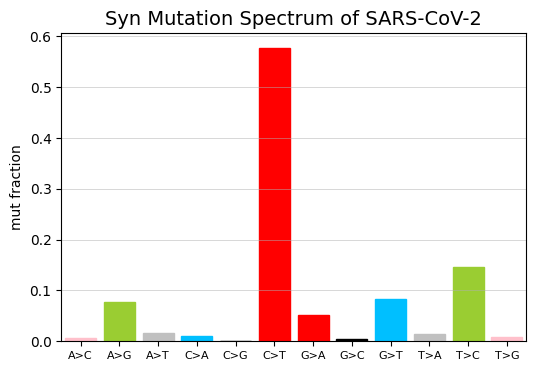

In [37]:
fig = plt.figure(figsize=(6, 4))
ax = sns.barplot(x="from_to_nuc", y='counter', data=data, order=sbs12_ordered, ax=fig.gca())
ax.grid(axis="y", alpha=.7, linewidth=0.5)
for bar, clr in zip(ax.patches, colors12):
    bar.set_color(clr)
ax.set_title('Syn Mutation Spectrum of SARS-CoV-2', fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("mut fraction")
plt.xticks(fontsize=8)
plt.show()
plt.close()

In [42]:
ns_df = df[df['(SBS) is nonsynonymous'].isin(['TRUE', 'True'])]
ns_df = ns_df[ns_df['base(s) in status 1'].isin(['A', 'T', 'G', 'C']) & ns_df['base(s) in status 2'].isin(['A', 'T', 'G', 'C'])]

In [43]:
ns_df['aa_from'] = ns_df['(SBS) AA change'].str.split(" ").str[1].str[0]
ns_df['aa_to'] = ns_df['(SBS) AA change'].str.split(" ").str[1].str[0]
color_mapping12 = {
    "C>A": "deepskyblue",
    "G>T": "deepskyblue",
    "C>G": "black",
    "G>C": "black",
    "C>T": "red",
    "G>A": "red",
    "T>A": "silver",
    "A>T": "silver",
    "T>C": "yellowgreen",
    "A>G": "yellowgreen",
    "T>G": "pink",
    "A>C": "pink",
}
#sbs12_ordered = ["C>A", "G>T", "C>G", "G>C", "C>T", "G>A", "T>A", "A>T", "T>C", "A>G", "T>G", "A>C"]
sbs12_ordered = ["A>C", "A>G", "A>T", "C>A", "C>G", "C>T", "G>A", "G>C", "G>T", "T>A", "T>C", "T>G"]
colors12 = [color_mapping12[sbs] for sbs in sbs12_ordered]
ns_df = ns_df.reset_index(drop=True)
ns_df['counter'] = ns_df.index
ns_df['from_to_nuc'] = ns_df['base(s) in status 1'] + '>' + ns_df['base(s) in status 2']
data = ns_df[['from_to_nuc', 'counter']].groupby(['from_to_nuc'], as_index=False).count()
n_mut = int(sum(data['counter']))
max_mut = int(max(data['counter']))
data['counter'] = data['counter']/n_mut

In [44]:
data

,from_to_nuc,counter
0,A>C,0.016329
1,A>G,0.083492
2,A>T,0.020210
3,C>A,0.027384
4,C>G,0.008031
5,C>T,0.390074
6,G>A,0.076719
7,G>C,0.022272
8,G>T,0.273577
9,T>A,0.010440


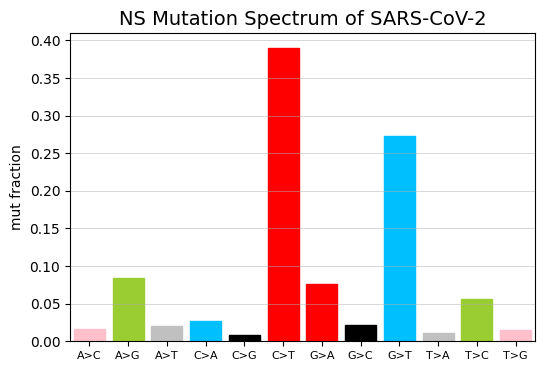

In [45]:
fig = plt.figure(figsize=(6, 4))
ax = sns.barplot(x="from_to_nuc", y='counter', data=data, order=sbs12_ordered, ax=fig.gca())
ax.grid(axis="y", alpha=.7, linewidth=0.5)
for bar, clr in zip(ax.patches, colors12):
    bar.set_color(clr)
ax.set_title('NS Mutation Spectrum of SARS-CoV-2', fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("mut fraction")
plt.xticks(fontsize=8)
plt.show()
plt.close()

In [46]:
all_df = df[df['base(s) in status 1'].isin(['A', 'T', 'G', 'C']) & df['base(s) in status 2'].isin(['A', 'T', 'G', 'C'])]

In [47]:
all_df['aa_from'] = all_df['(SBS) AA change'].str.split(" ").str[1].str[0]
all_df['aa_to'] = all_df['(SBS) AA change'].str.split(" ").str[1].str[0]
color_mapping12 = {
    "C>A": "deepskyblue",
    "G>T": "deepskyblue",
    "C>G": "black",
    "G>C": "black",
    "C>T": "red",
    "G>A": "red",
    "T>A": "silver",
    "A>T": "silver",
    "T>C": "yellowgreen",
    "A>G": "yellowgreen",
    "T>G": "pink",
    "A>C": "pink",
}
#sbs12_ordered = ["C>A", "G>T", "C>G", "G>C", "C>T", "G>A", "T>A", "A>T", "T>C", "A>G", "T>G", "A>C"]
sbs12_ordered = ["A>C", "A>G", "A>T", "C>A", "C>G", "C>T", "G>A", "G>C", "G>T", "T>A", "T>C", "T>G"]
colors12 = [color_mapping12[sbs] for sbs in sbs12_ordered]
all_df = all_df.reset_index(drop=True)
all_df['counter'] = all_df.index
all_df['from_to_nuc'] = all_df['base(s) in status 1'] + '>' + all_df['base(s) in status 2']
data = all_df[['from_to_nuc', 'counter']].groupby(['from_to_nuc'], as_index=False).count()
n_mut = int(sum(data['counter']))
max_mut = int(max(data['counter']))
data['counter'] = data['counter']/n_mut

C:\Users\voron\AppData\Local\Temp\ipykernel_13032\1653699303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['aa_from'] = all_df['(SBS) AA change'].str.split(" ").str[1].str[0]
C:\Users\voron\AppData\Local\Temp\ipykernel_13032\1653699303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['aa_to'] = all_df['(SBS) AA change'].str.split(" ").str[1].str[0]


In [48]:
data

,from_to_nuc,counter
0,A>C,0.014375
1,A>G,0.087801
2,A>T,0.017458
3,C>A,0.021726
4,C>G,0.003944
5,C>T,0.465352
6,G>A,0.073376
7,G>C,0.013590
8,G>T,0.181967
9,T>A,0.013291


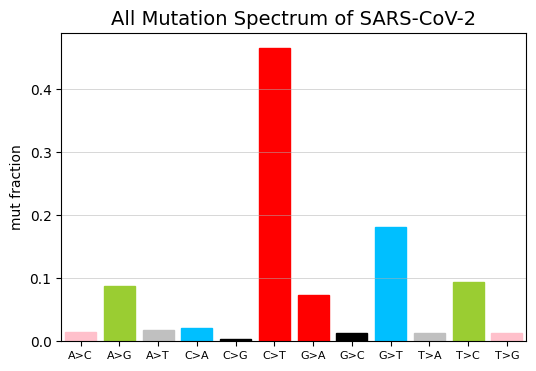

In [49]:
fig = plt.figure(figsize=(6, 4))
ax = sns.barplot(x="from_to_nuc", y='counter', data=data, order=sbs12_ordered, ax=fig.gca())
ax.grid(axis="y", alpha=.7, linewidth=0.5)
for bar, clr in zip(ax.patches, colors12):
    bar.set_color(clr)
ax.set_title('All Mutation Spectrum of SARS-CoV-2', fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("mut fraction")
plt.xticks(fontsize=8)
plt.show()
plt.close()

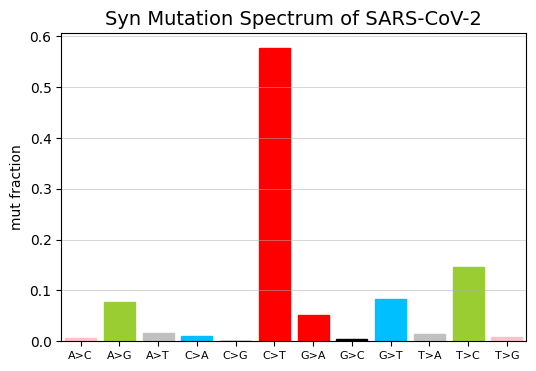

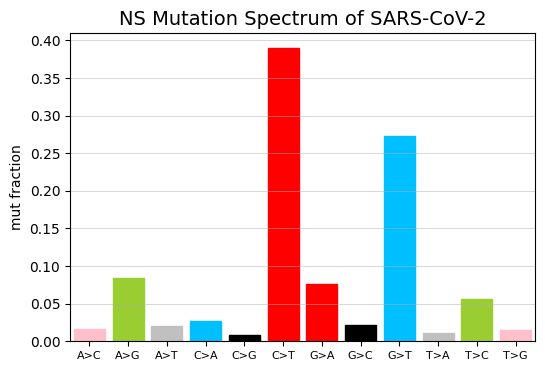

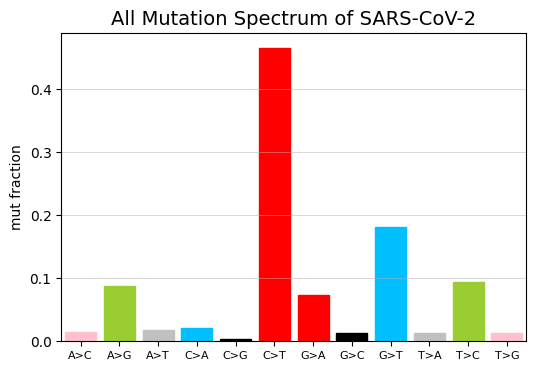

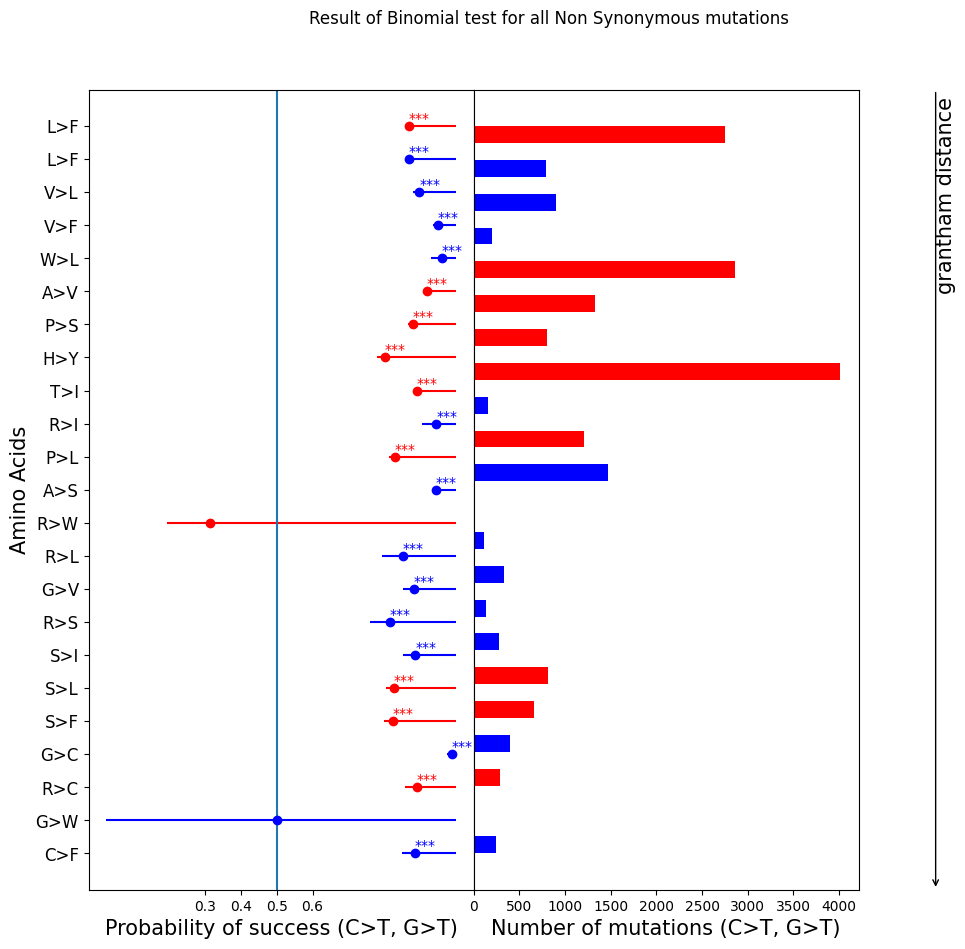

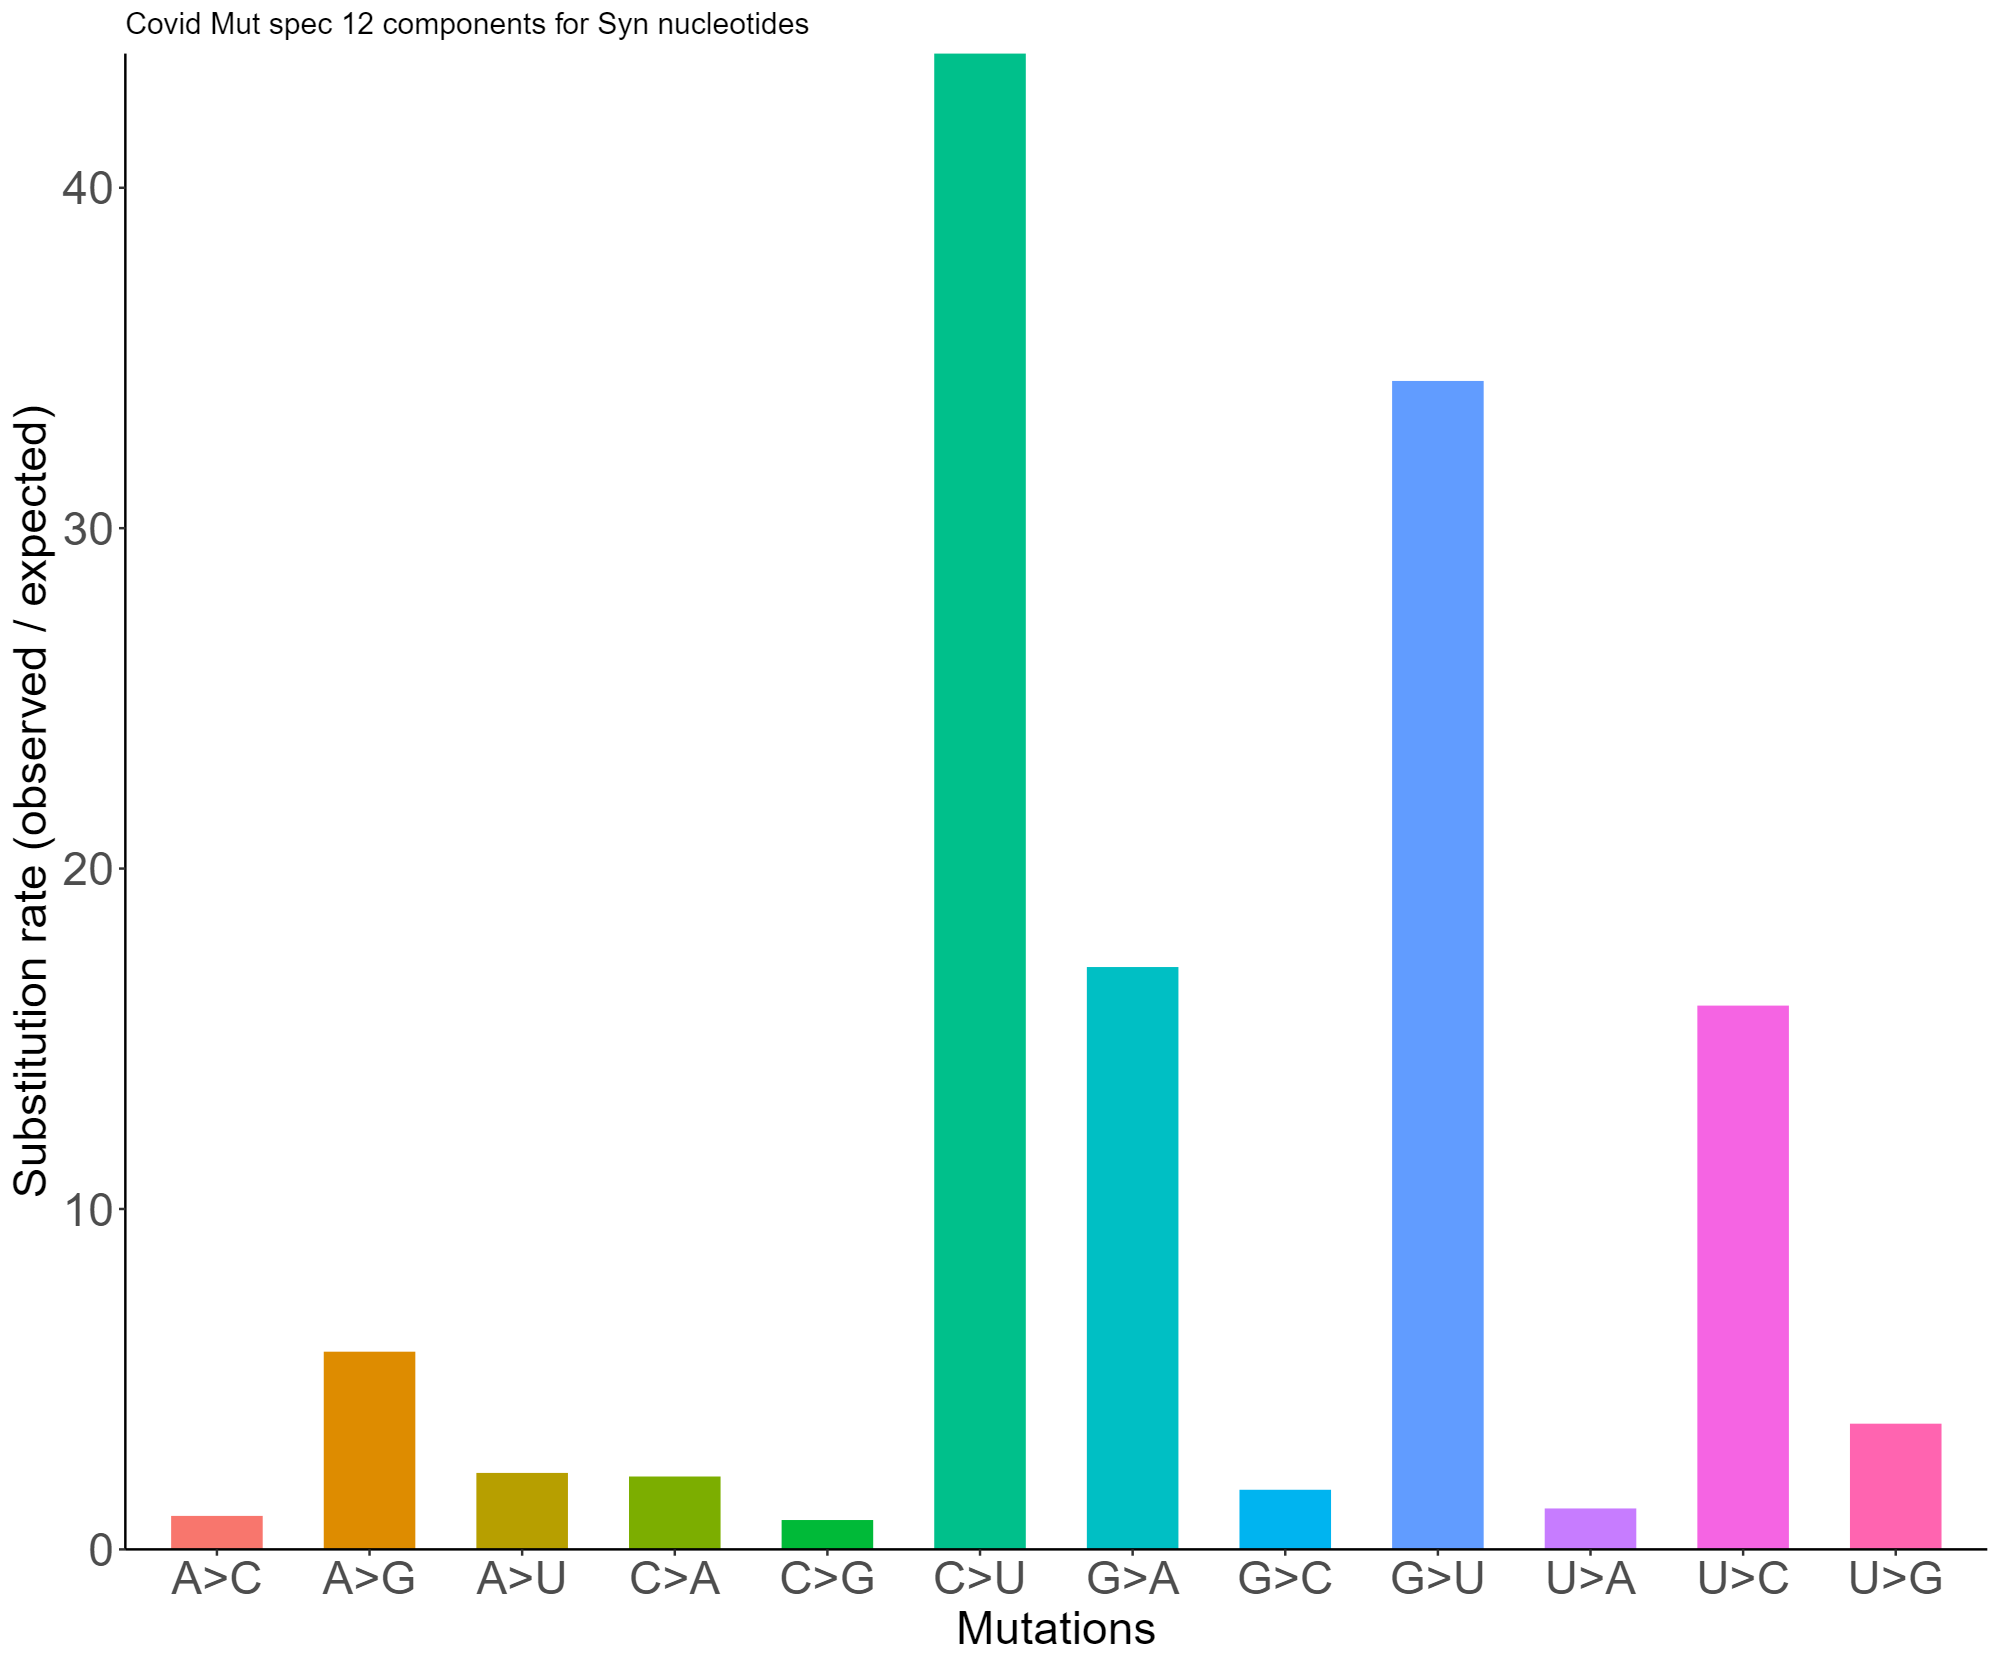

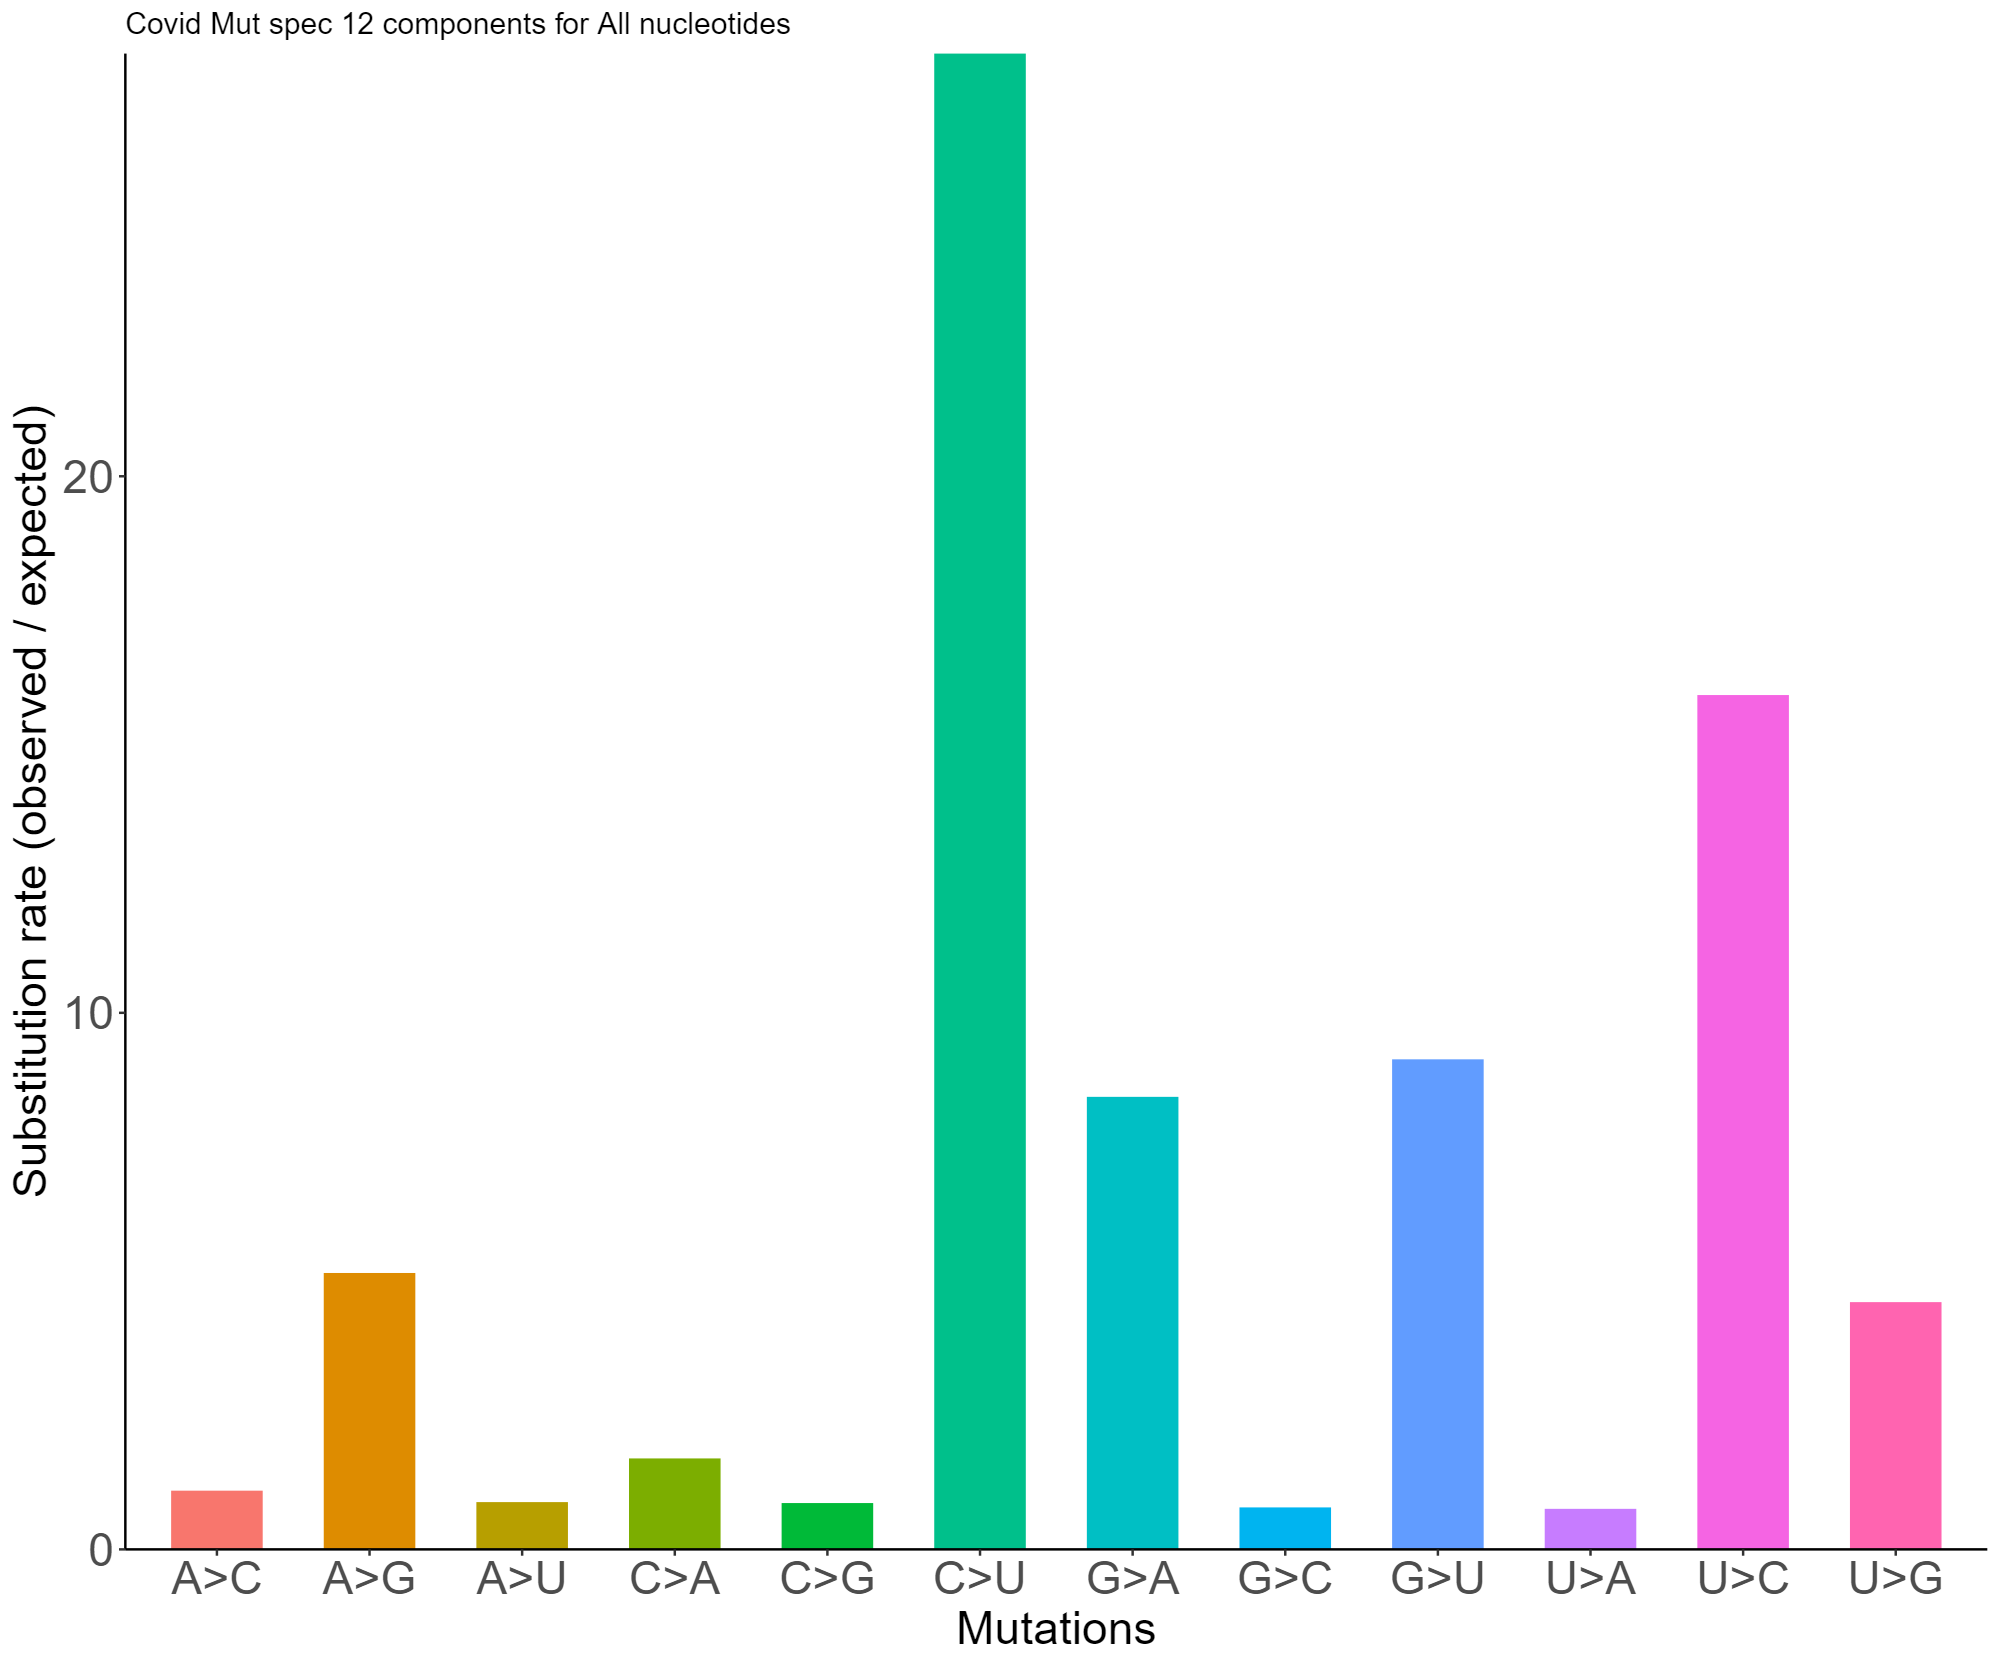

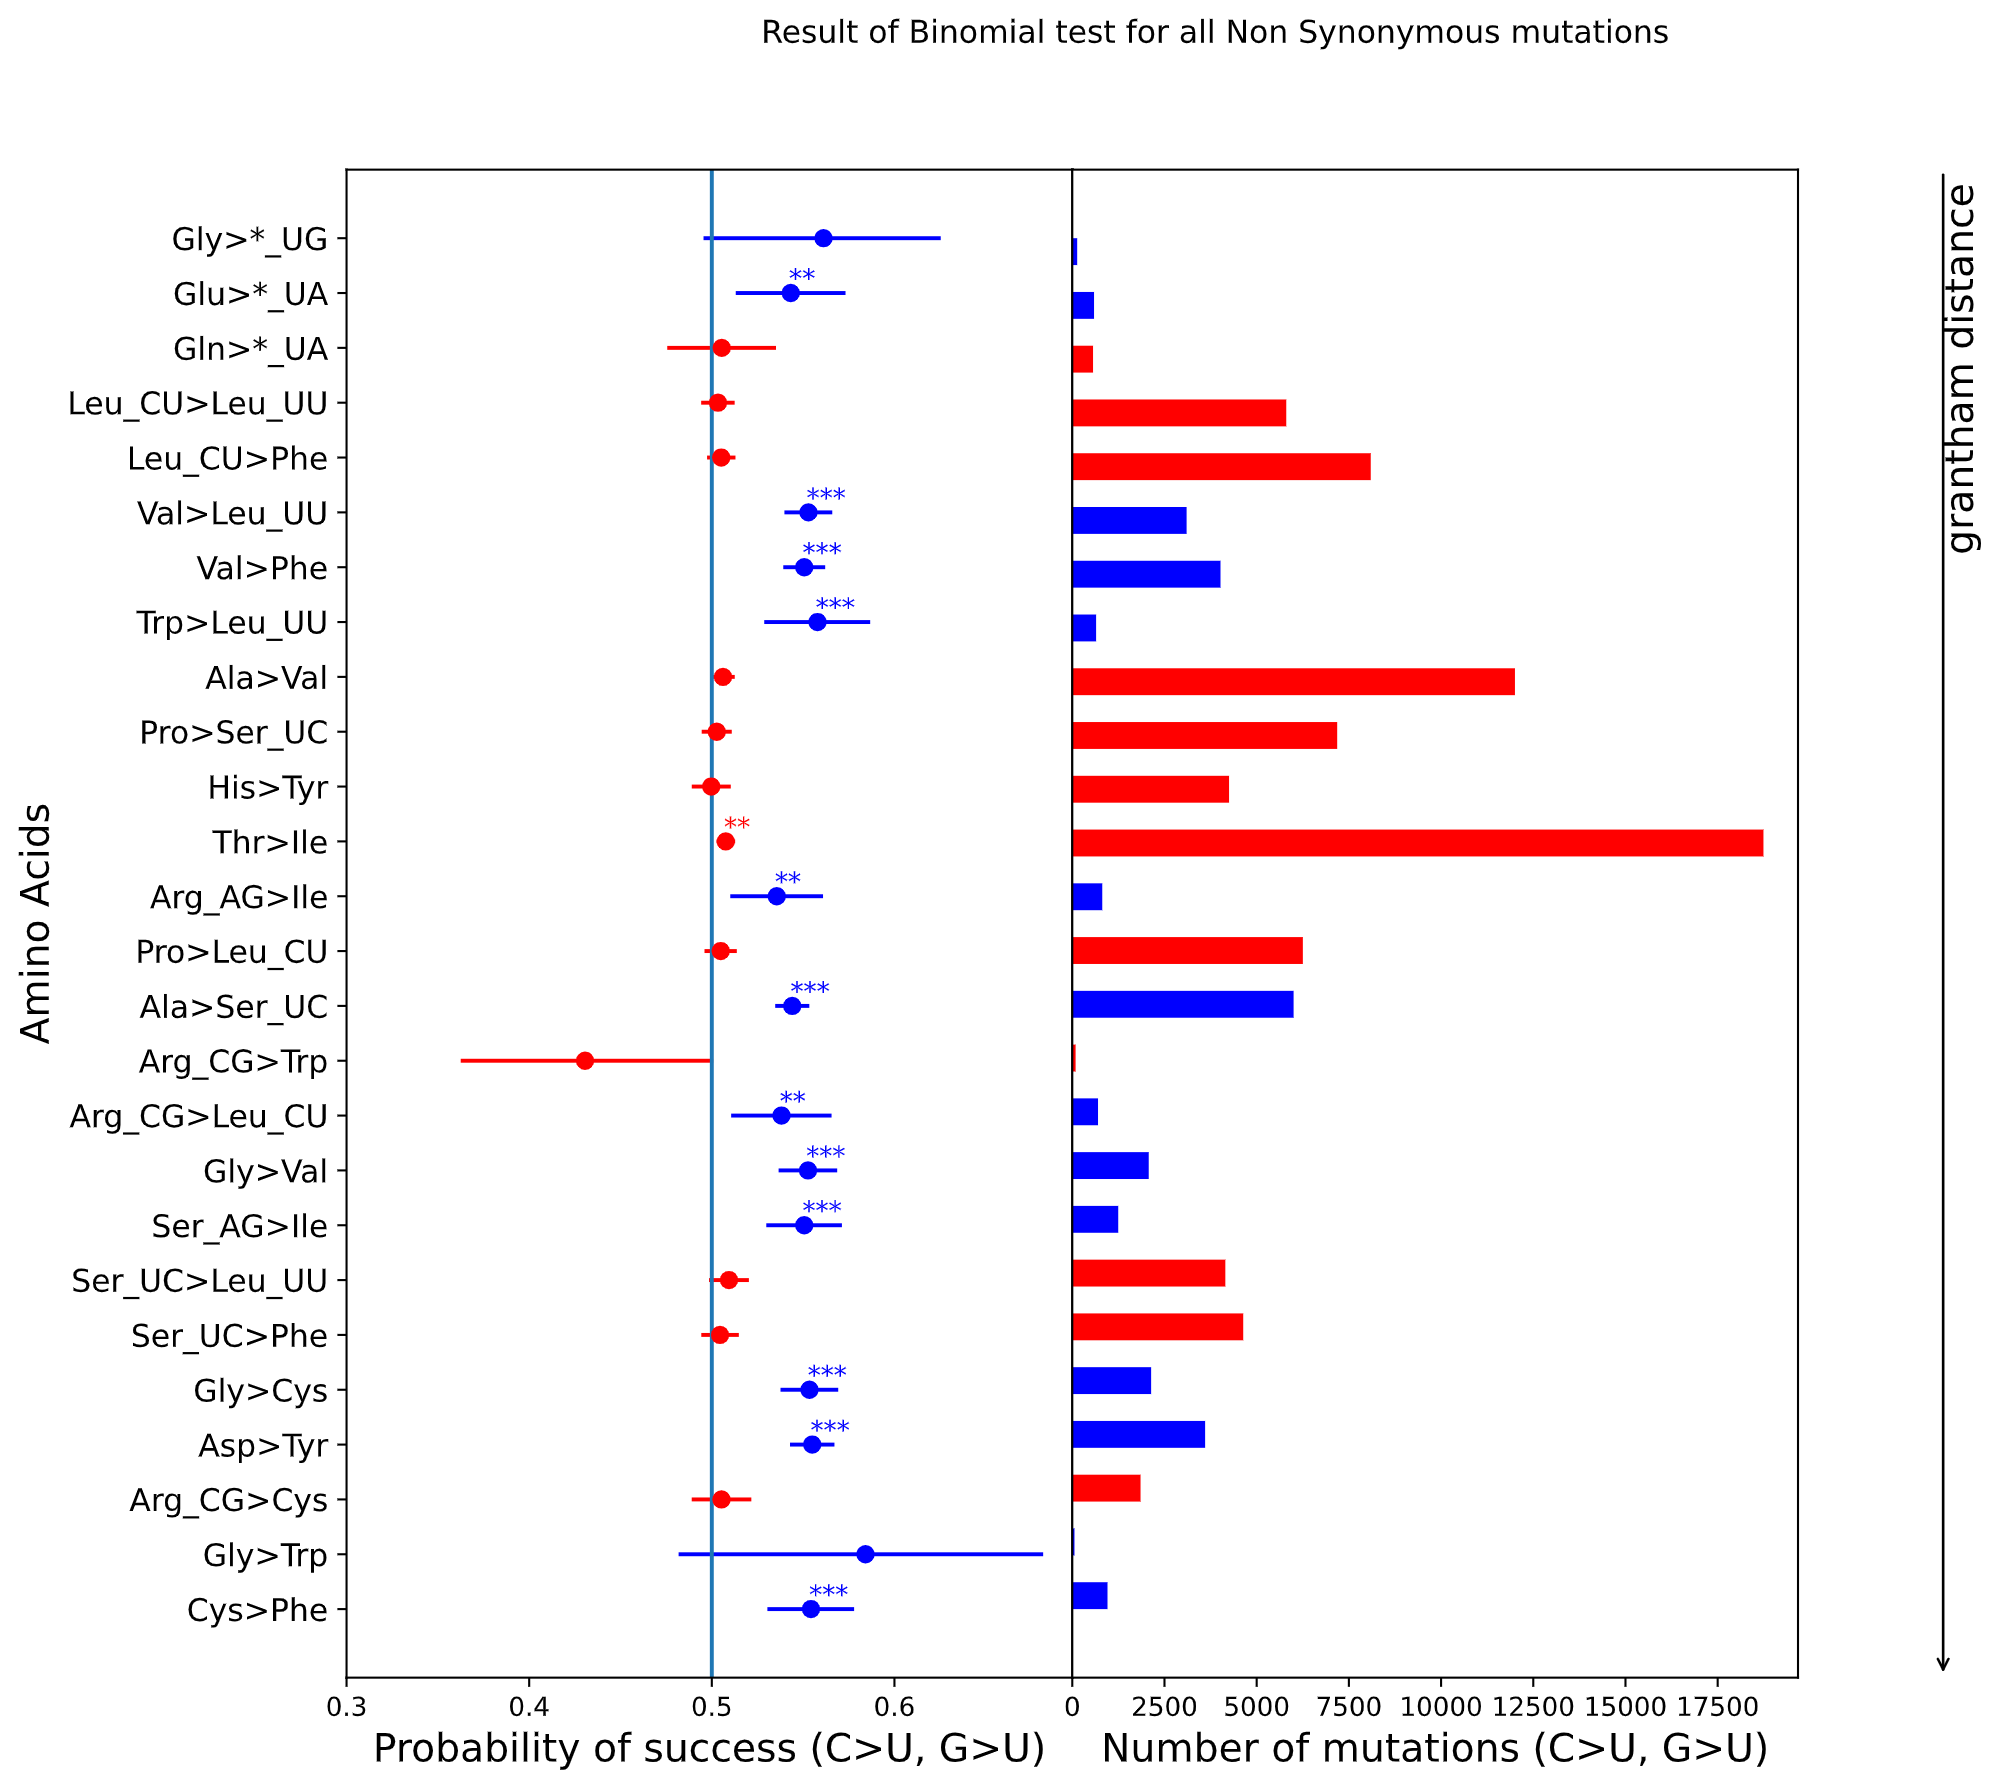